[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


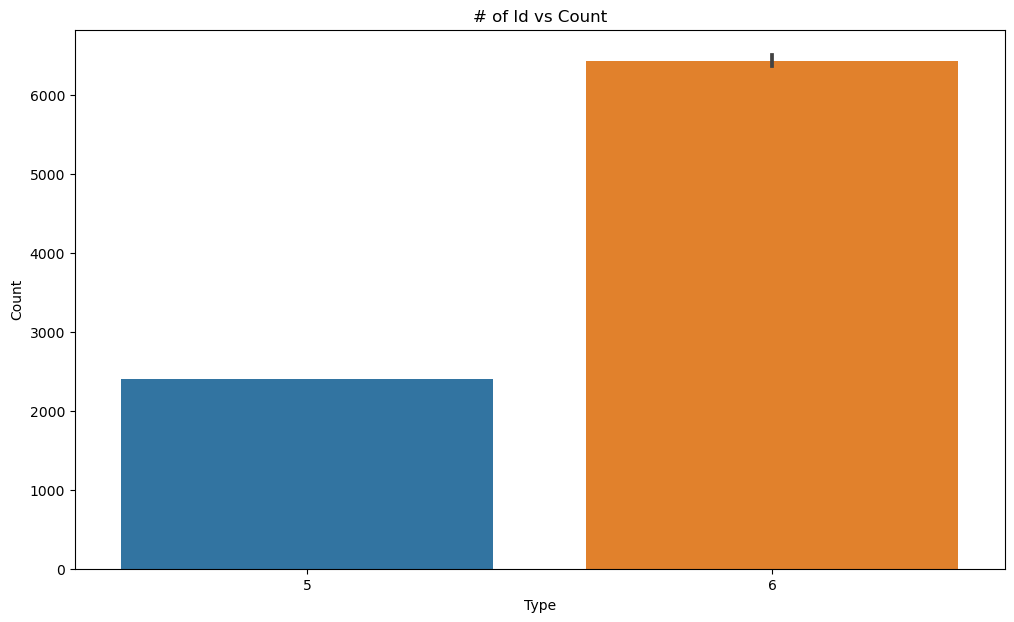

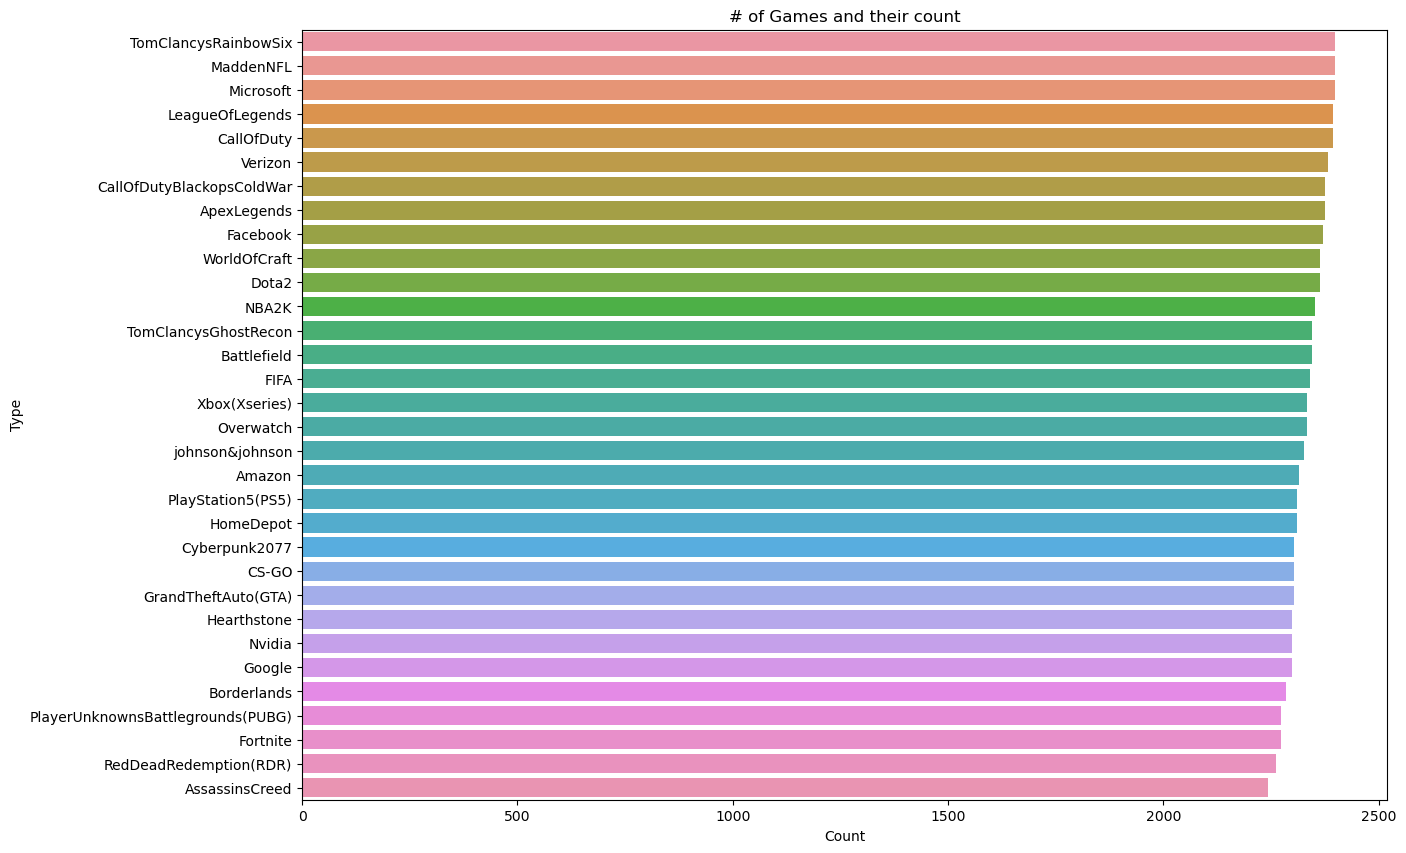

Total records =  74681
Total records =  74681


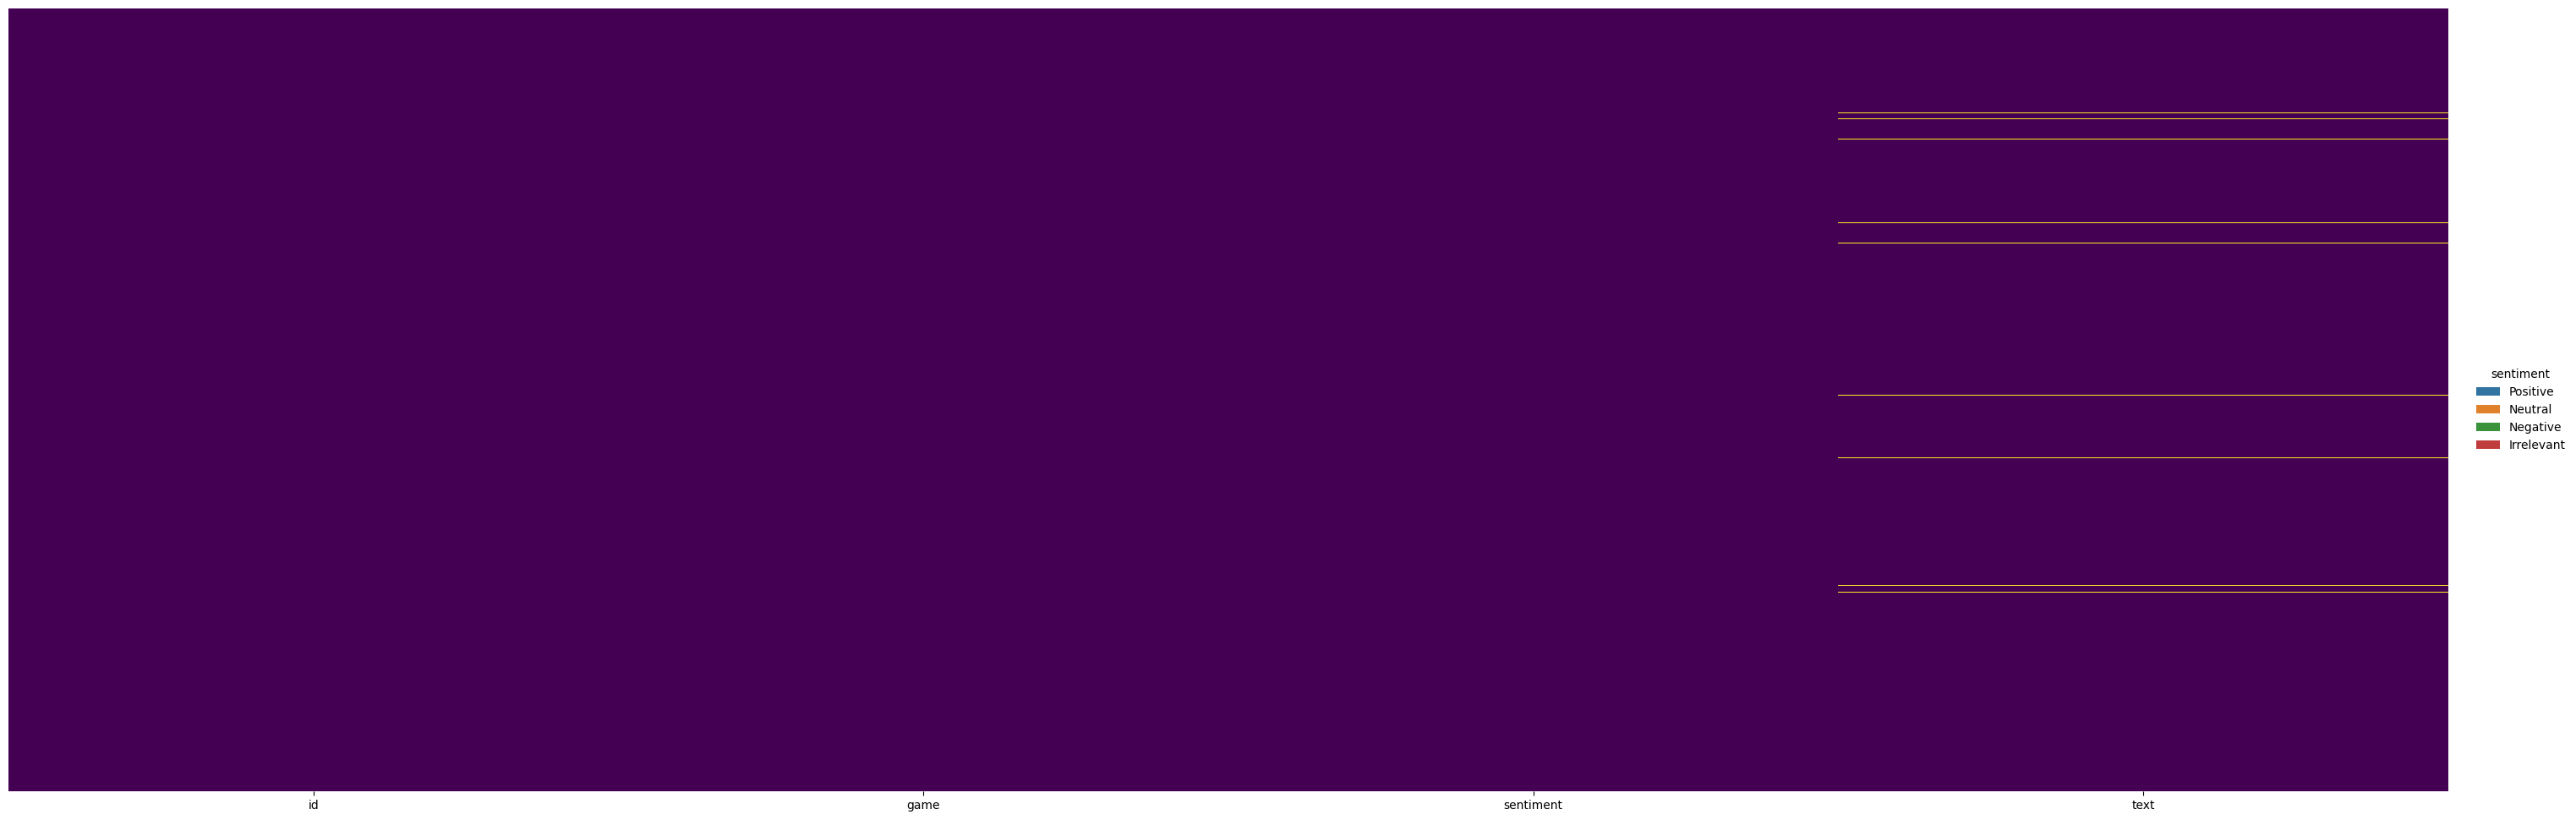

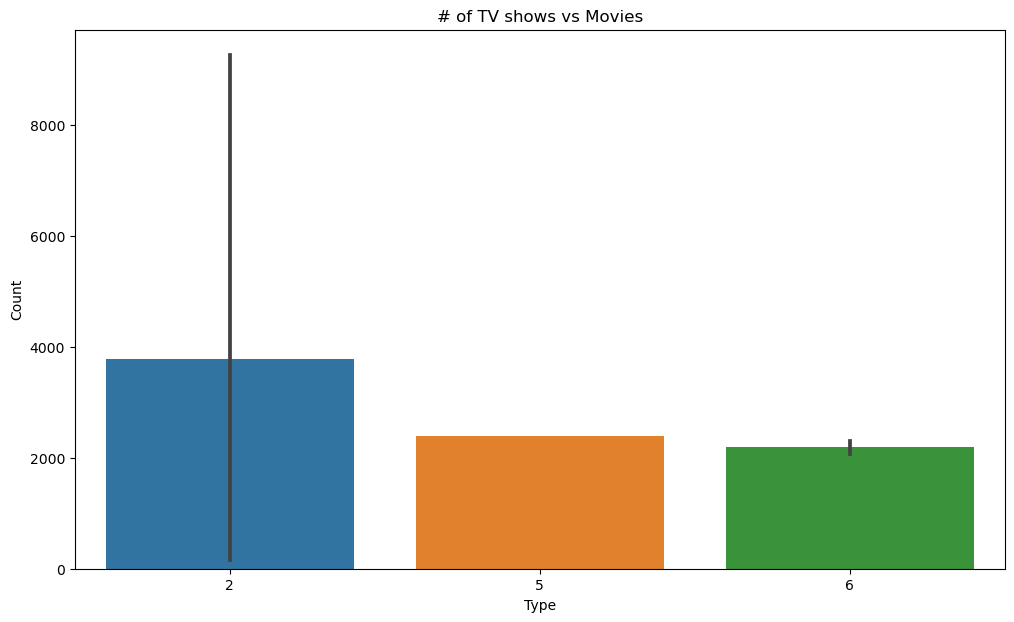

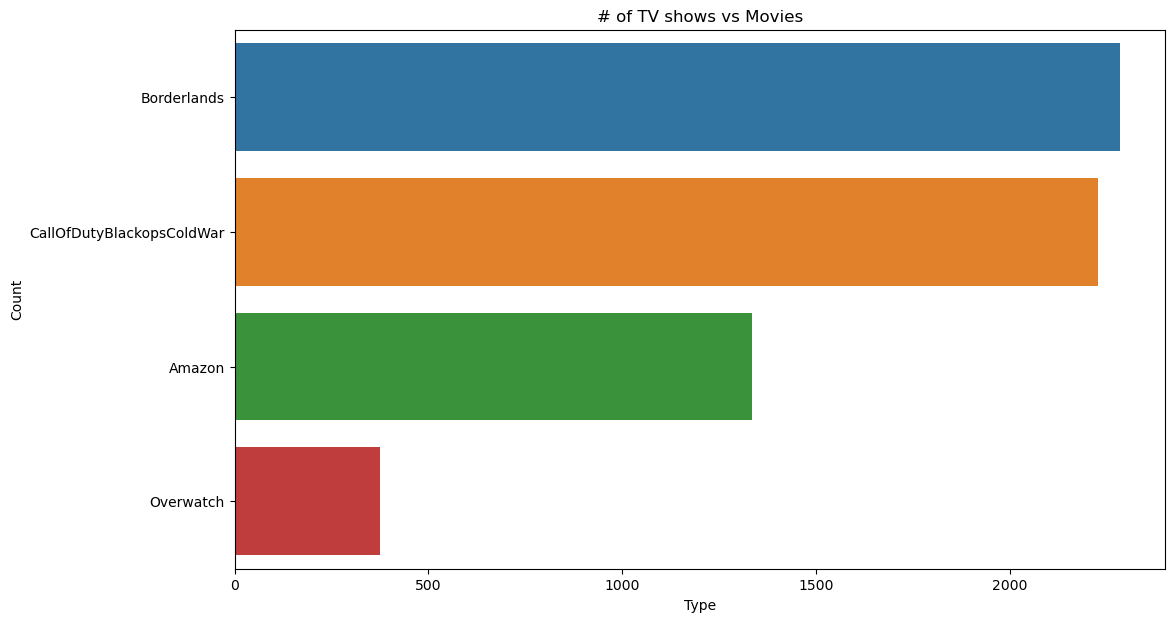

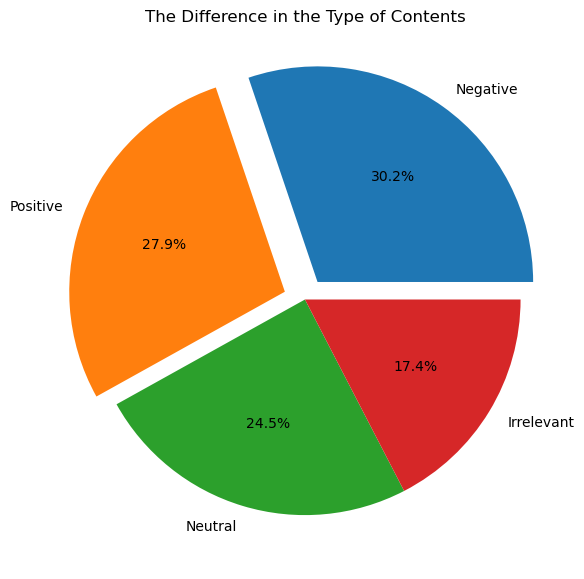

id           999
game          32
sentiment      4
text         998
dtype: int64

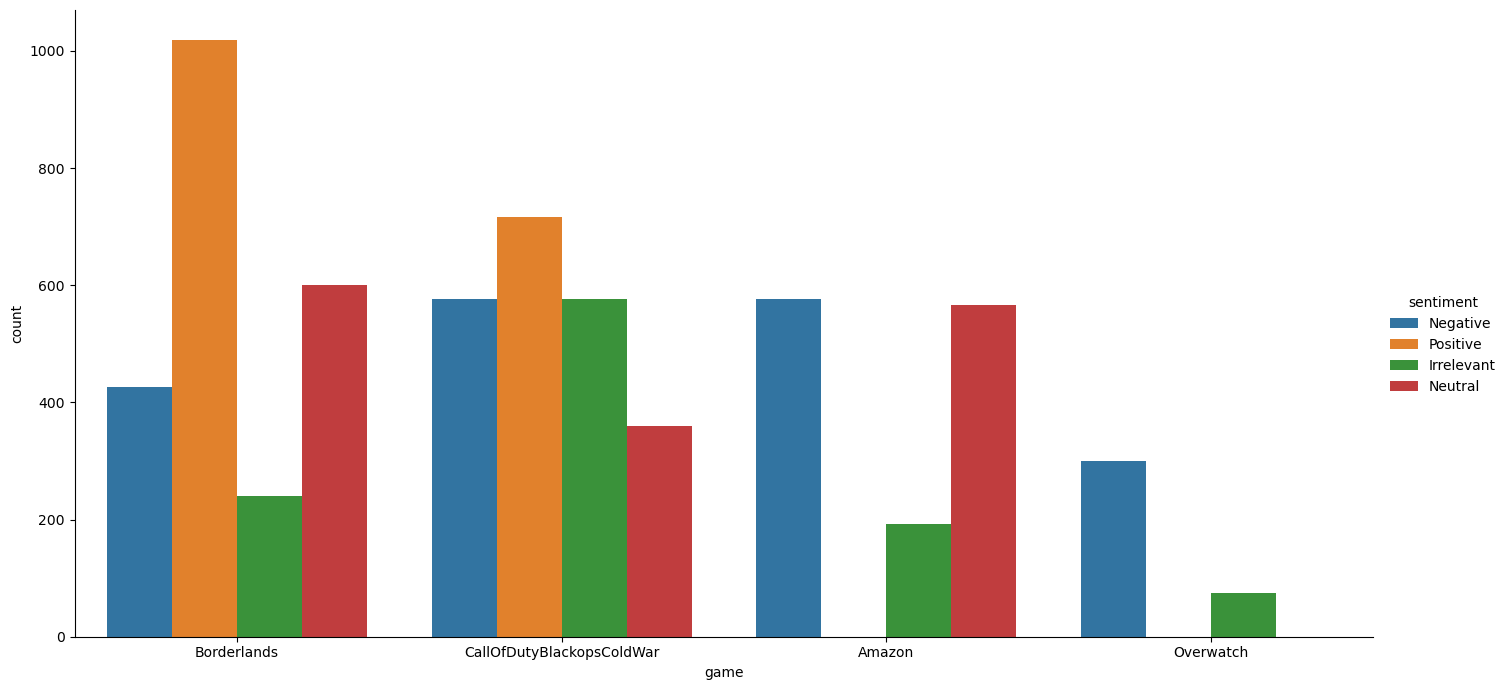

In [107]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline










In [108]:
import nltk
nltk.download('stopwords')

data = pd.read_csv('C:\\Users\\hp\\Desktop\\Prodigy\\archive\\twitter_training.csv')
v_data = pd.read_csv('C:\\Users\\hp\\Desktop\\Prodigy\\archive\\twitter_validation.csv')


v_data


data.columns = ['id', 'game', 'sentiment', 'text']
v_data.columns = ['id', 'game', 'sentiment', 'text']

data

v_data

data.shape

data.columns

data.describe(include='all')




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,game,sentiment,text
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


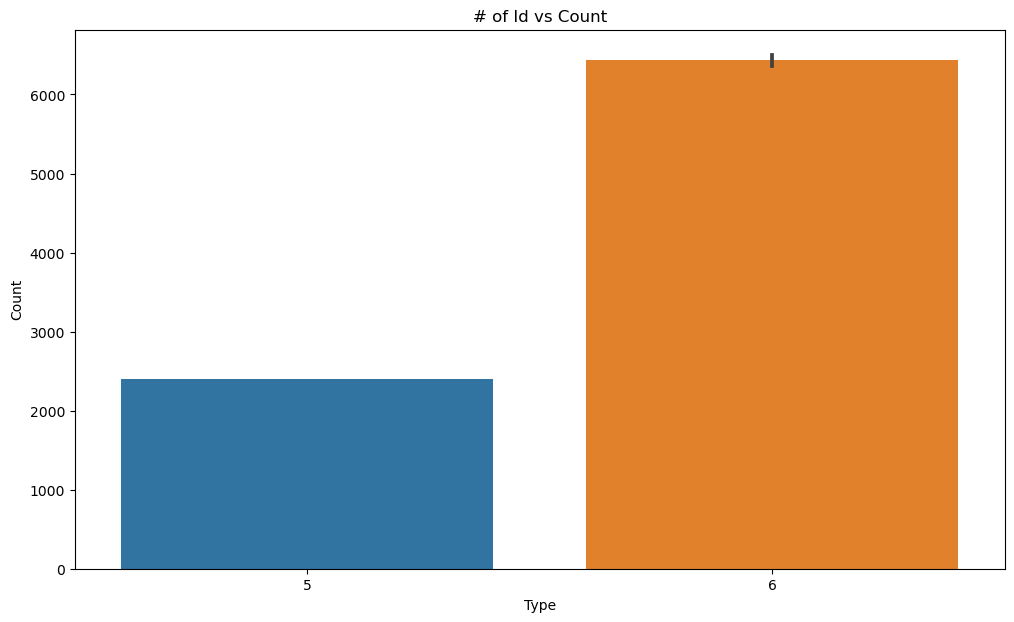

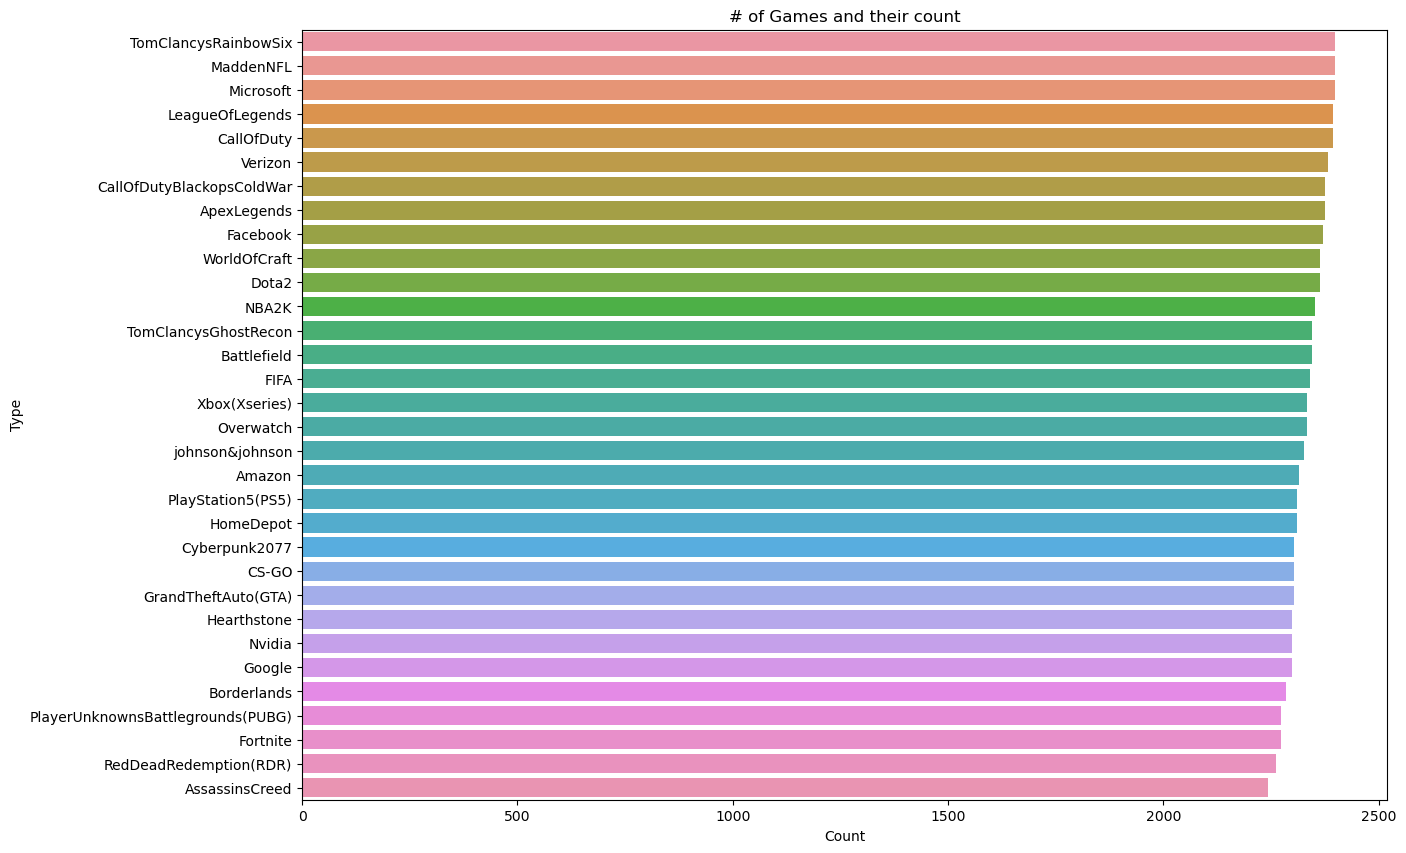

Total records =  74681
Total records =  74681


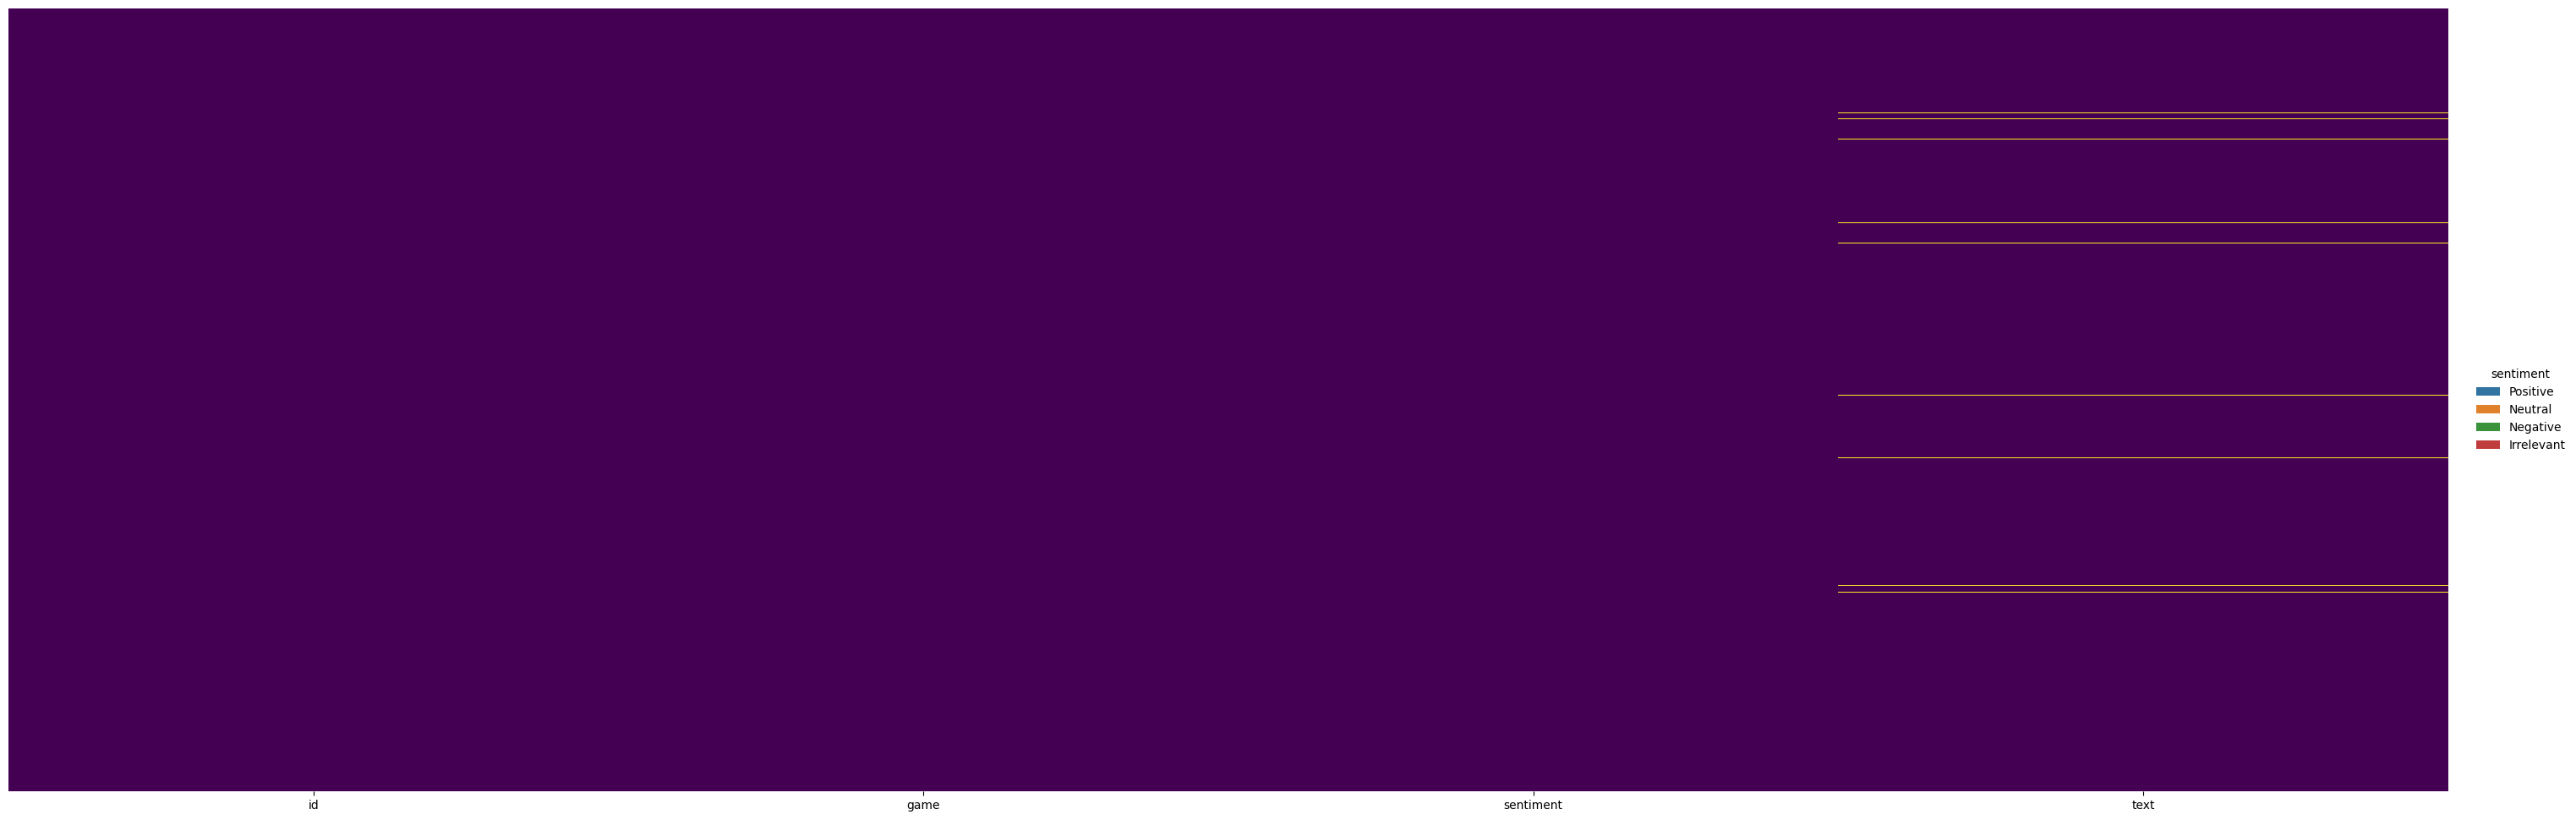

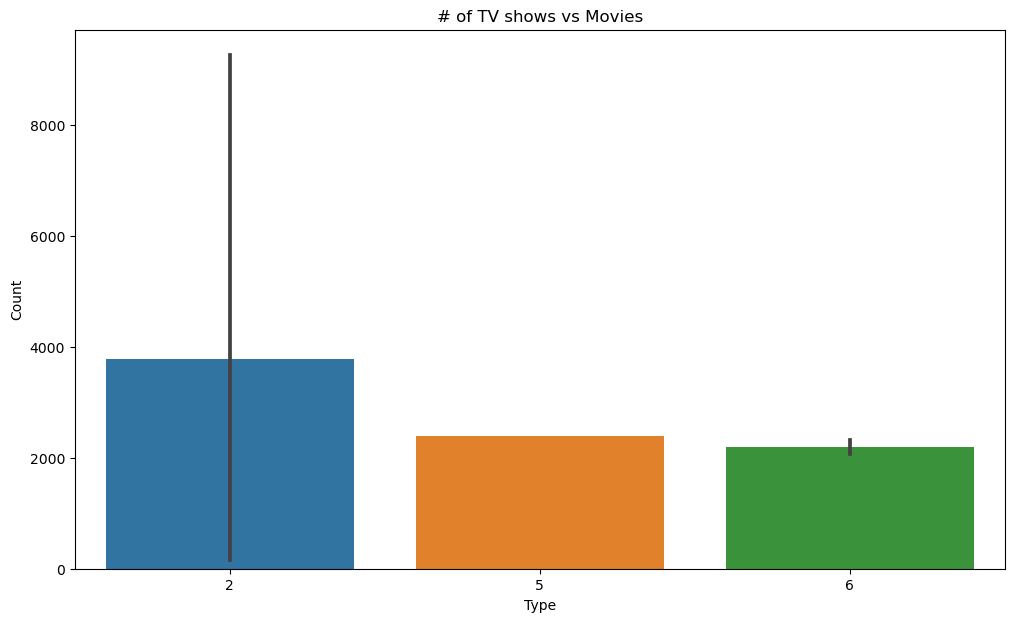

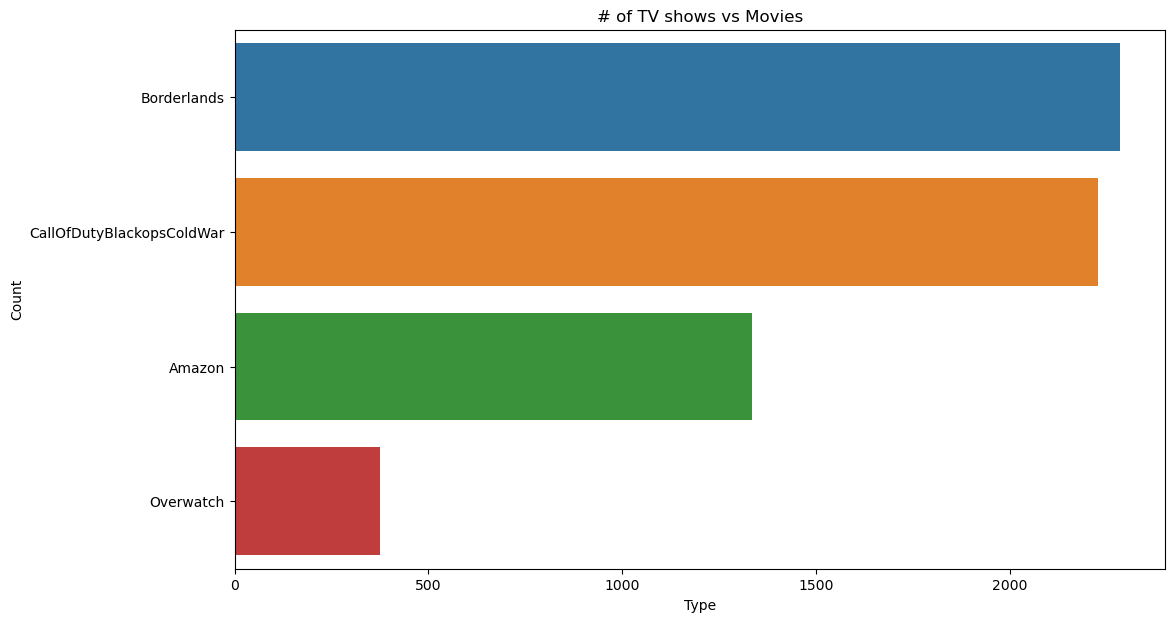

In [109]:
id_types = data['id'].value_counts()
id_types

plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values)  
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of Id vs Count')
plt.show()

game_types = data['game'].value_counts()
game_types

plt.figure(figsize=(14,10))

sns.barplot(x=game_types.values,y=game_types.index)  
plt.title('# of Games and their count')
plt.ylabel('Type')
plt.xlabel('Count')
plt.show()

sns.catplot(x="game",hue="sentiment", kind="count",height=10,aspect=3, data=data)

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)


total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)


train0=data[data['sentiment']=="Negative"]
train1=data[data['sentiment']=="Positive"]
train2=data[data['sentiment']=="Irrelevant"]
train3=data[data['sentiment']=="Neutral"]

train0.shape, train1.shape, train2.shape, train3.shape

train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]


train0.shape, train1.shape, train2.shape, train3.shape

data=pd.concat([train0,train1,train2,train3],axis=0)
data



id_types = data['id'].value_counts()
id_types




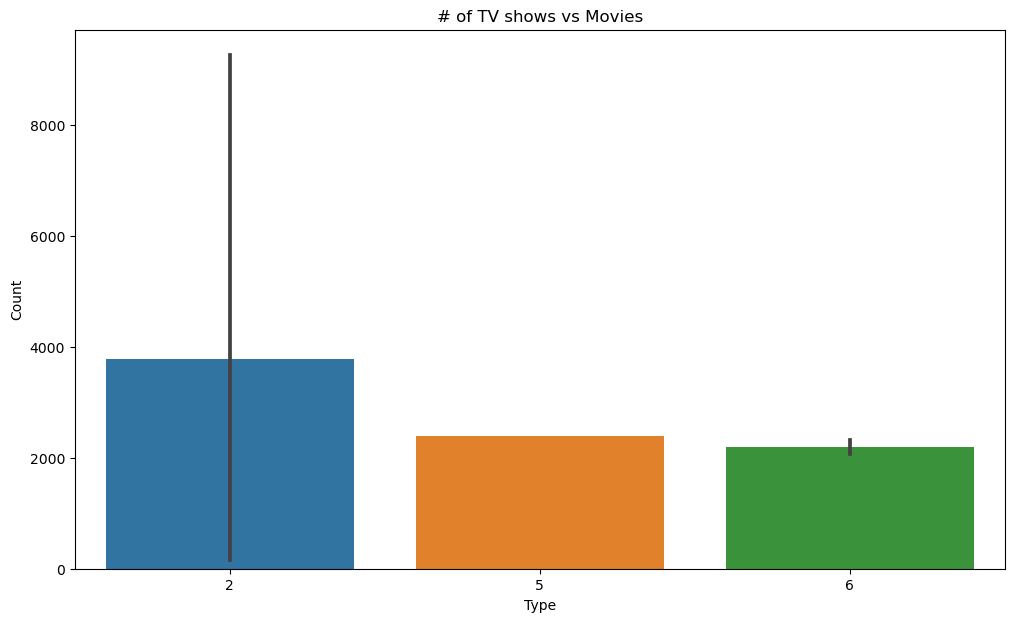

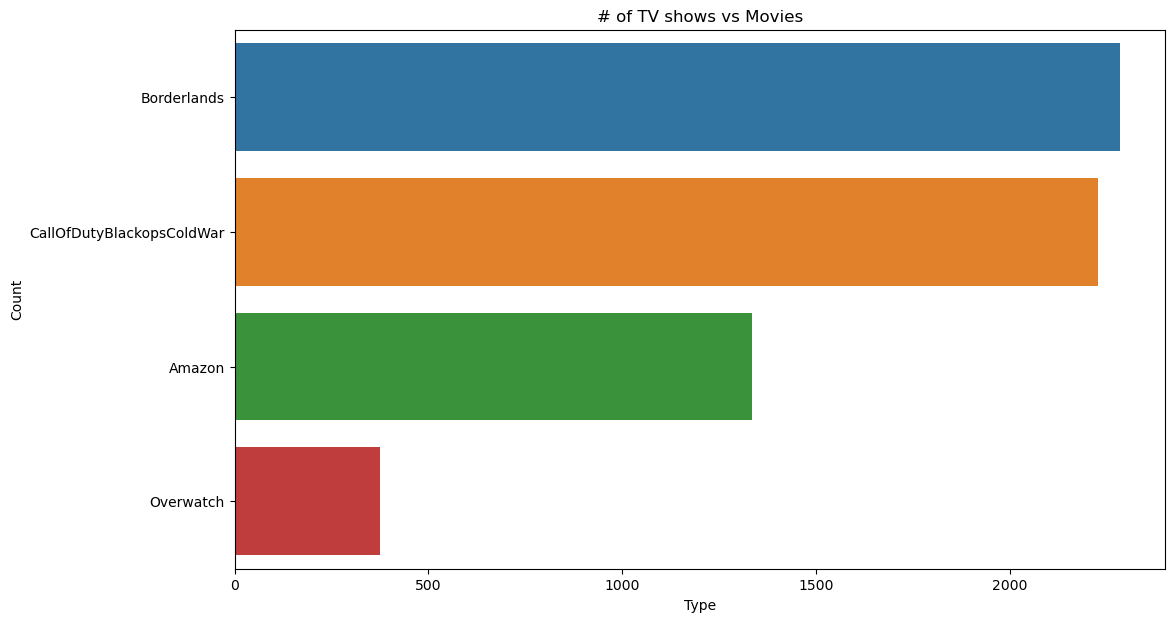

In [110]:
plt.figure(figsize=(12,7))
sns.barplot(x=id_types.values,y=id_types.index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

game_types = data['game'].value_counts()
game_types

plt.figure(figsize=(12,7))
sns.barplot(x=game_types.values,y=game_types.index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()



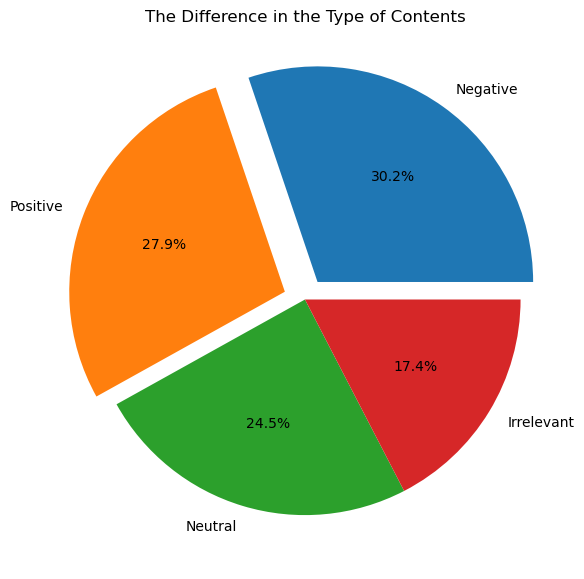

id           999
game          32
sentiment      4
text         998
dtype: int64

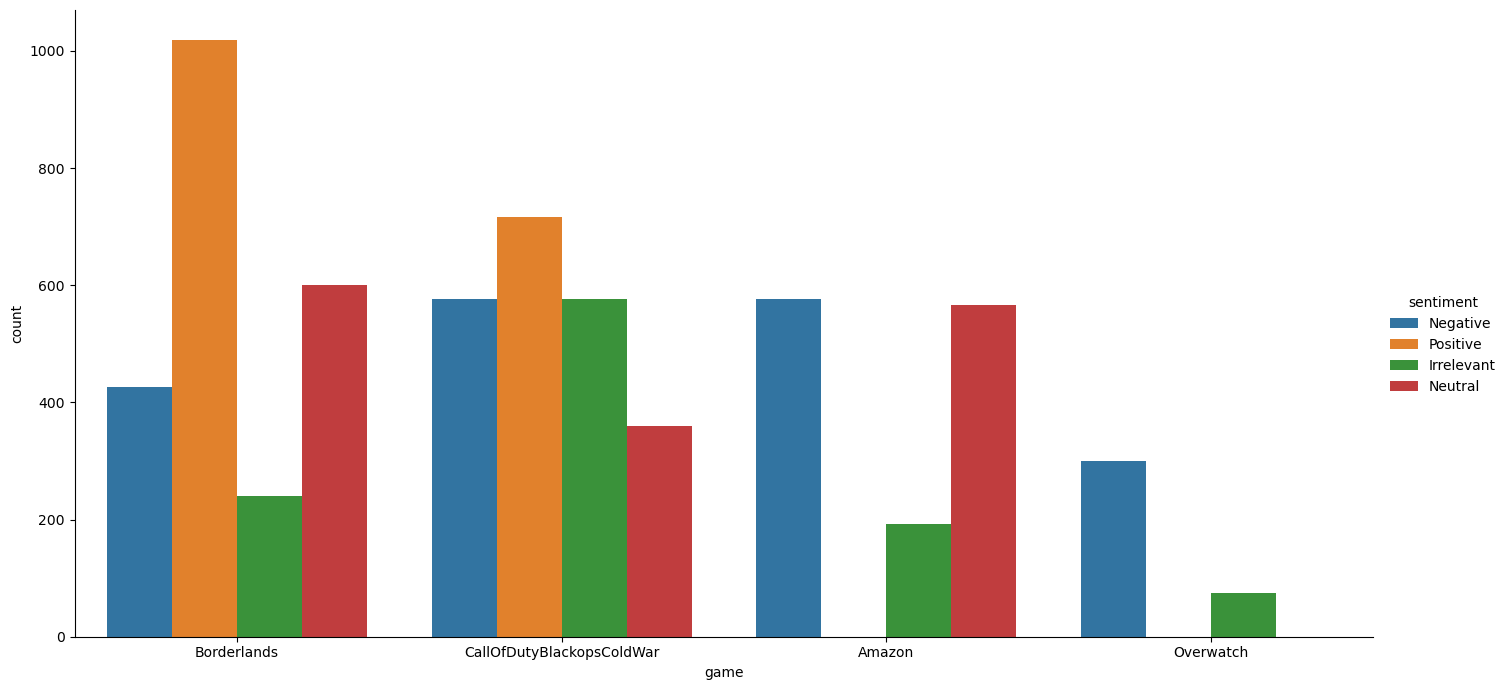

In [111]:
sentiment_types = data['sentiment'].value_counts()
sentiment_types


plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

sns.catplot(x='game',hue='sentiment',kind='count',height=7,aspect=2,data=data)


from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


data['sentiment']=label_encoder.fit_transform(data['sentiment'])
data['game']=label_encoder.fit_transform(data['game'])
v_data['sentiment']=label_encoder.fit_transform(v_data['sentiment'])
v_data['game']=label_encoder.fit_transform(v_data['game'])

data = data.drop(['id'],axis=1)
data

data.nunique()

v_data.nunique()